In [1]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sn
from tensorflow import keras
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
def show_fig (x,y,index):
    plt.imshow(x[index])
    plt.xlabel(y[index])

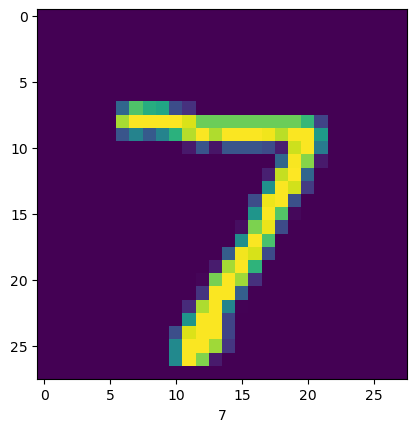

In [9]:
show_fig(x_test,y_test,0)

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
 model = keras.Sequential([
    keras.layers.Conv2D(filters=28, kernel_size=(4, 4), padding = 'same' activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2, 2)),
        
    keras.layers.Flatten(),
    keras.layers.Dense(28, activation='relu'),
    keras.layers.Dense(10, activation='softmax')

])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 103s 54ms/step - loss: 0.1990 - accuracy: 0.9400
Epoch 2/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0733 - accuracy: 0.9780
Epoch 3/5
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0512 - accuracy: 0.9842
Epoch 4/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0404 - accuracy: 0.9878
Epoch 5/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0319 - accuracy: 0.9904


In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 13s 42ms/step - loss: 0.0416 - accuracy: 0.9875


[0.04159927740693092, 0.987500011920929]

In [15]:
y_bla_bla = model.predict(x_test)

313/313 [==============================] - 13s 40ms/step


In [16]:
y_bla_bla

array([[1.93194865e-08, 1.87823090e-09, 1.00568752e-06, ...,
        9.99998152e-01, 3.85994348e-08, 5.58191431e-08],
       [5.04337017e-10, 5.31677927e-07, 9.99999464e-01, ...,
        9.42368406e-12, 3.25659388e-09, 3.54597028e-14],
       [2.37951940e-06, 9.99615014e-01, 1.61607295e-05, ...,
        2.62500602e-04, 2.31044924e-05, 4.24128484e-06],
       ...,
       [1.87900238e-12, 3.79911186e-10, 4.31150497e-11, ...,
        2.29748665e-08, 5.42864989e-08, 5.31237674e-06],
       [1.10431206e-10, 3.83419019e-10, 2.87028214e-12, ...,
        9.37707911e-10, 2.70267308e-04, 3.91047861e-09],
       [5.42648309e-08, 5.90926474e-11, 6.31049417e-08, ...,
        2.36070725e-14, 2.65380629e-09, 4.38573006e-13]], dtype=float32)

In [17]:
y_bla_bla.shape

(10000, 10)

In [26]:
y_pred = y_bla_bla.argmax(axis=1)

In [27]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [28]:
y_pred.shape

(10000,)

In [29]:
y_test.shape

(10000,)

Text(95.72222222222221, 0.5, 'Truth')

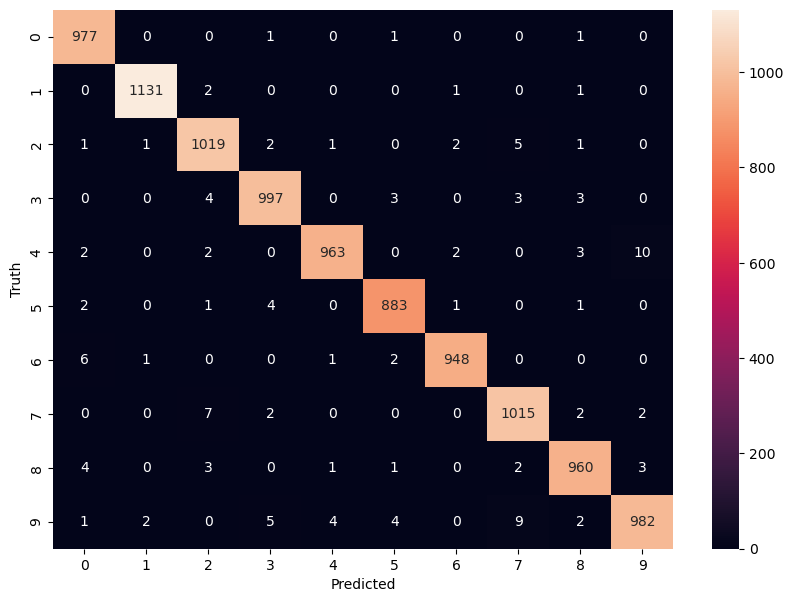

In [30]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

